<a href="https://colab.research.google.com/github/biraj21/deep_learning_with_tf/blob/main/ch4/newswires_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import reuters

In [3]:
def vectorize_sequences(sequences, dims=10_000):
    result = np.zeros((len(sequences), dims))
    for i, sequence in enumerate(sequences):
        for word_index in sequence:
            result[i, word_index] = 1

    return result

In [4]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=10_000)

# Decoding sequences

In [5]:
word_to_index = reuters.get_word_index()
index_to_word = dict(
    [(value, key) for key, value in word_to_index.items()]
)

def decode_sequence(encoded):
    return " ".join(index_to_word.get(i - 3, "?") for i in encoded)

In [6]:
for i in range(5):
    print(decode_sequence(x_train[i]))
    print()

? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3

? generale de banque sa lt ? br and lt heller overseas corp of chicago have each taken 50 pct stakes in ? company sa ? factors generale de banque said in a statement it gave no financial details of the transaction sa ? ? turnover in 1986 was 17 5 billion belgian francs reuter 3

? shr 3 28 dlrs vs 22 cts shr diluted 2 99 dlrs vs 22 cts net 46 0 mln vs 3 328 000 avg shrs 14 0 mln vs 15 2 mln year shr 5 41 dlrs vs 1 56 dlrs shr diluted 4 94 dlrs vs 1 50 dlrs net 78 2 mln vs 25 9 mln avg shrs 14 5 mln vs 15 1 mln note earnings per share reflect the two for one split effective january 6 1987 per share amou

# Data Preprocessing

In [7]:
x_train = vectorize_sequences(x_train)
x_test = vectorize_sequences(x_test)

# Holdout Validation and Training

In [8]:
# setting aside 1000 training samples for model validation
x_val = x_train[:1000]
y_val = y_train[:1000]

partial_x_train = x_train[1000:]
partial_y_train = y_train[1000:]

In [9]:
model = keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax"),
])

model.compile(
    optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

history = model.fit(
    partial_x_train, 
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val),
    verbose=2
)

epochs_range = range(1, 21)
df_history = pd.DataFrame(history.history, index=epochs_range)

Epoch 1/20
16/16 - 2s - loss: 2.3501 - accuracy: 0.5388 - val_loss: 1.4900 - val_accuracy: 0.6860 - 2s/epoch - 129ms/step
Epoch 2/20
16/16 - 1s - loss: 1.1945 - accuracy: 0.7523 - val_loss: 1.1481 - val_accuracy: 0.7500 - 1s/epoch - 72ms/step
Epoch 3/20
16/16 - 1s - loss: 0.8526 - accuracy: 0.8178 - val_loss: 1.0208 - val_accuracy: 0.7810 - 1s/epoch - 73ms/step
Epoch 4/20
16/16 - 1s - loss: 0.6383 - accuracy: 0.8666 - val_loss: 0.9659 - val_accuracy: 0.7930 - 1s/epoch - 72ms/step
Epoch 5/20
16/16 - 1s - loss: 0.4826 - accuracy: 0.8991 - val_loss: 0.9171 - val_accuracy: 0.8060 - 1s/epoch - 72ms/step
Epoch 6/20
16/16 - 1s - loss: 0.3732 - accuracy: 0.9225 - val_loss: 0.8598 - val_accuracy: 0.8210 - 1s/epoch - 71ms/step
Epoch 7/20
16/16 - 1s - loss: 0.2883 - accuracy: 0.9362 - val_loss: 0.8870 - val_accuracy: 0.8180 - 1s/epoch - 70ms/step
Epoch 8/20
16/16 - 1s - loss: 0.2340 - accuracy: 0.9474 - val_loss: 0.9215 - val_accuracy: 0.8090 - 1s/epoch - 70ms/step
Epoch 9/20
16/16 - 1s - loss: 0

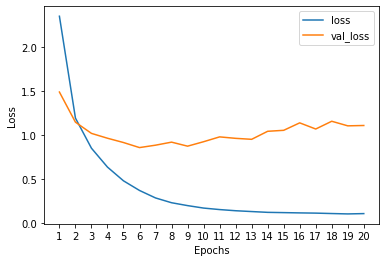

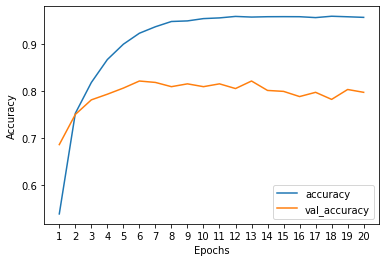

In [10]:
df_history.loc[:, ["loss","val_loss"]].plot(
    xticks=epochs_range,
    xlabel="Epochs",
    ylabel="Loss"
)
df_history.loc[:, ["accuracy", "val_accuracy"]].plot(
    xticks=epochs_range,
    xlabel="Epochs",
    ylabel="Accuracy"
)

In [11]:
df_history.head(10)

,loss,accuracy,val_loss,val_accuracy
1,2.350087,0.538837,1.489990,0.686
2,1.194458,0.752318,1.148117,0.750
3,0.852635,0.817840,1.020842,0.781
4,0.638312,0.866575,0.965915,0.793
5,0.482558,0.899148,0.917090,0.806
6,0.373183,0.922451,0.859773,0.821
7,0.288317,0.936231,0.887022,0.818
8,0.234042,0.947382,0.921533,0.809
9,0.201380,0.948634,0.875880,0.815
10,0.173389,0.953520,0.926357,0.809


# Final Training
Now training the model on all training data.

In [12]:
model = keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax"),
])

model.compile(
    optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model.fit(
    x_train,
    y_train,
    epochs=6,
    batch_size=512,
    verbose=2
)

Epoch 1/6
18/18 - 2s - loss: 2.3434 - accuracy: 0.5876 - 2s/epoch - 95ms/step
Epoch 2/6
18/18 - 1s - loss: 1.1266 - accuracy: 0.7620 - 1s/epoch - 81ms/step
Epoch 3/6
18/18 - 1s - loss: 0.7907 - accuracy: 0.8367 - 1s/epoch - 72ms/step
Epoch 4/6
18/18 - 1s - loss: 0.5809 - accuracy: 0.8803 - 1s/epoch - 65ms/step
Epoch 5/6
18/18 - 1s - loss: 0.4386 - accuracy: 0.9068 - 1s/epoch - 66ms/step
Epoch 6/6
18/18 - 1s - loss: 0.3403 - accuracy: 0.9282 - 1s/epoch - 66ms/step


In [13]:
model.evaluate(x_test, y_test)

71/71 [==============================] - 0s 4ms/step - loss: 0.9321 - accuracy: 0.7930


[0.9321408867835999, 0.792965292930603]